In [ ]:
try:
     from dlroms import*
except:
     !pip install --no-deps git+https://github.com/NicolaRFranco/dlroms.git
     from dlroms import*
!pip install pyDOE
!pip install -q ray
!pip install -U "ray[default]"

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18170 sha256=32f967c065a826b215f505bd9f1cc3895cfb9c064504c57d030dbac583c0a272
  Stored in directory: /root/.cache/pip/wheels/84/20/8c/8bd43ba42b0b6d39ace1219d6da1576e0dac81b12265c4762e
Successfully built pyDOE
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 32.8 MB/s eta 0:00:00


In [ ]:
#cpu info (no parallelization possible: 1 core 2 threads)
"""!lscpu | grep '^CPU(s)'
!lscpu | grep 'Model name'
!lscpu"""

"!lscpu | grep '^CPU(s)'\n!lscpu | grep 'Model name'\n!lscpu"

# **Assignments overview - Part 1**

This notebook contains a brief overview of three assignments related to the first part of the course.

**NB**: if you are using Colab to run this notebook, make sure to upload the scripts $\textsf{dispenser.py}$, $\textsf{playground.py}$ and $\textsf{electron.py}$ to the notebook environment ("Folder" icon on your left, near the "Key" icon). If you are working locally, instead, make sure that those scripts are in the same folder of the notebook.

## **Convection-diffusion equation**: designing a chemical dispenser

In [ ]:
from dispenser import *
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import ray

In [ ]:
u ,M,S,B,b= FOMsolver(40, 20, 30)
u.shape

(701, 1940)

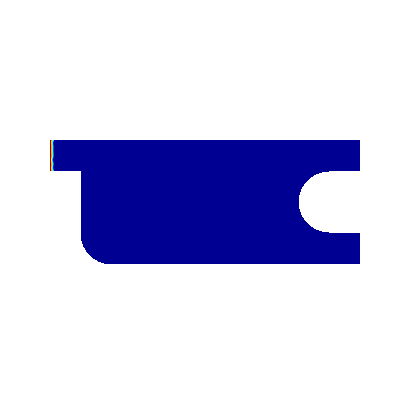

In [ ]:
fe.animate(u[::10], Vh)

In [ ]:
from dispenser import bottomOutflow

print(bottomOutflow(u))

0.022940463063376885


In [ ]:
#np.random.seed(0)
cList=[]
uList=[]
bList = []
nsim=20
t0=perf_counter()
for i in range(nsim):
  np.random.seed(0+i)
  c1,c2,c3=np.random.uniform(0,50,size=3)
  u,M,S,B,b=FOMsolver(c1, c2, c3)
  cList.append([c1,c2,c3])
  bList.append(b)
  uList.append(u)
t1=perf_counter()
print(f"Time: {(t1-t0)/60} minutes")
"""c=np.array(cList)
u=np.array(uList)
b=np.array(bList)
print(c.shape,u.shape,b.shape)
print(u.shape)"""

Time: 3.9974117061 minutes


'c=np.array(cList)\nu=np.array(uList)\nb=np.array(bList)\nprint(c.shape,u.shape,b.shape)\nprint(u.shape)'

In [ ]:
#parallel implementation by "ray"

# Initialize Ray (you can control CPUs here)
ray.shutdown()
ray.init(num_cpus=2) #CPU numbers->colab 2 CPU (2 threads)
# link to dashboard
from google.colab import output
output.serve_kernel_port_as_iframe(8265) #port to dashboard

# Wrap the FOMsolver as a Ray remote function
@ray.remote
def run_simulation(seed_offset):
    np.random.seed(0 + seed_offset)  # manual seeding per worker
    c1, c2, c3 = np.random.uniform(0, 50, size=3)
    u, _, _, _, b = FOMsolver(c1, c2, c3)
    return [c1, c2, c3], u, b

# Run simulations in parallel
nsim = 20
# time & for-loop-parallelized
t0=perf_counter()
futures = [run_simulation.remote(i) for i in range(nsim)]
results = ray.get(futures)
t1=perf_counter()
print(f"Time: {(t1-t0)/(60)} minutes")
# Unpack results
cList, uList, bList = zip(*results)

# Convert to arrays
c = np.array(cList)
u = np.array(uList)
b = np.array(bList)

# Output
print("Shapes:")
print("c:", c.shape)
print("u:", u.shape)
print("b:", b.shape)

2025-05-22 08:28:22,511	INFO worker.py:1879 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


<IPython.core.display.Javascript object>

(pid=3277) 
(pid=3276) 


(pid=3276) Error   : Surface 86 is transfinite but has 42 corners


(pid=3276) Info    : Running 'gmsh -2 14345.geo' [Gmsh 4.14.0-git-6eebd2c92, 1 node, max. 1 thread]
(pid=3276) Info    : Started on Thu May 22 08:28:33 2025
(pid=3276) Info    : Reading '14345.geo'...
(pid=3276) Info    : Done reading '14345.geo'
(pid=3276) Info    : Meshing 1D...
(pid=3276) Info    : [  0%] Meshing curve 43 (Line)
(pid=3276) Info    : [ 10%] Meshing curve 44 (Line)
(pid=3276) Info    : [ 10%] Meshing curve 45 (Line)
(pid=3276) Info    : [ 10%] Meshing curve 46 (Line)
(pid=3276) Info    : [ 10%] Meshing curve 47 (Line)
(pid=3276) Info    : [ 20%] Meshing curve 48 (Line)
(pid=3276) Info    : [ 20%] Meshing curve 49 (Line)
(pid=3276) Info    : [ 20%] Meshing curve 50 (Line)
(pid=3276) Info    : [ 20%] Meshing curve 51 (Line)
(pid=3276) Info    : [ 30%] Meshing curve 52 (Line)
(pid=3276) Info    : [ 30%] Meshing curve 53 (Line)
(pid=3276) Info    : [ 30%] Meshing curve 54 (Line)
(pid=3276) Info    : [ 30%] Meshing curve 55 (Line)
(pid=3276) Info    : [ 40%] Meshing curve 

(pid=3276) Error   : ------------------------------
(pid=3276) Error   : Mesh generation error summary
(pid=3276) Error   :     0 warnings
(pid=3276) Error   :     1 error
(pid=3276) Error   : Check the full log for details
(pid=3276) Error   : ------------------------------


(pid=3276) Info    : 1940 nodes 3920 elements
(pid=3276) Info    : Writing '14345.msh'...
(pid=3276) Info    : Done writing '14345.msh'
(pid=3276) Info    : Stopped on Thu May 22 08:28:33 2025 (From start: Wall 0.183094s, CPU 0.211212s)


(pid=3276) Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
(pid=3276) Expecting 1940 vertices
(pid=3276) Found all vertices
(pid=3276) Expecting 3668 cells
(pid=3276) Found all cells
(pid=3276) Conversion done

:task_name:run_simulation


(pid=3277) Info    : Running 'gmsh -2 64415.geo' [Gmsh 4.14.0-git-6eebd2c92, 1 node, max. 1 thread]
(pid=3277) Info    : Started on Thu May 22 08:28:33 2025
(pid=3277) Info    : Reading '64415.geo'...
(pid=3277) Info    : Done reading '64415.geo'
(pid=3277) Info    : Meshing 2D... [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication fo

In [ ]:
v_lift_fom = np.ones(1940)

print(v_lift_fom.shape)

print("Before lift:", old_value := u[0,0,1939])
u = u - v_lift_fom[None,None, :]
print("After lift:", u[0,0,1939])


(1940,)
Before lift: 1.0
After lift: 0.0


1940


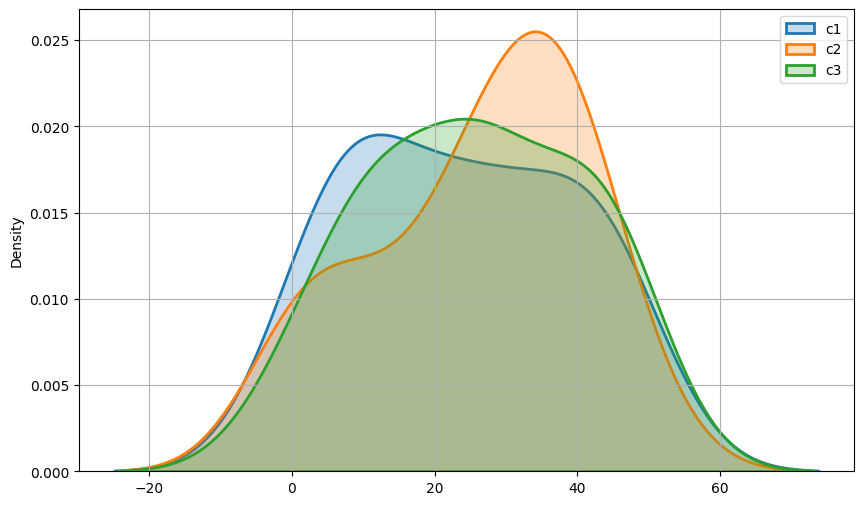

In [ ]:
print(Vh.dim())
#print(c)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(c[:,0], fill=True, linewidth=2, label='c1')
sns.kdeplot(c[:,1], fill=True, linewidth=2, label='c2')
sns.kdeplot(c[:,2], fill=True, linewidth=2, label='c3')
plt.legend()
plt.grid()

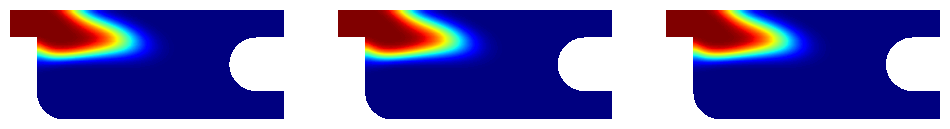

In [ ]:
t=500
fe.multiplot([u[1,t,:Vh.dim()] for _ in range(3)],(1,3),Vh)

# Snapshot matrix
la snapshot matrix viene costruita usando le simulazioni fatte in questo caso per il train usiamo 10/20 simulazioni svolte

In [ ]:
ntrain=10
utrain=u[:ntrain] #prendo le prime 10 simulazioni
print(utrain.shape)
utrain=utrain.reshape(-1,Vh.dim()).T #snapshot matrix
print(utrain.shape)

(10, 701, 1940)
(1940, 7010)


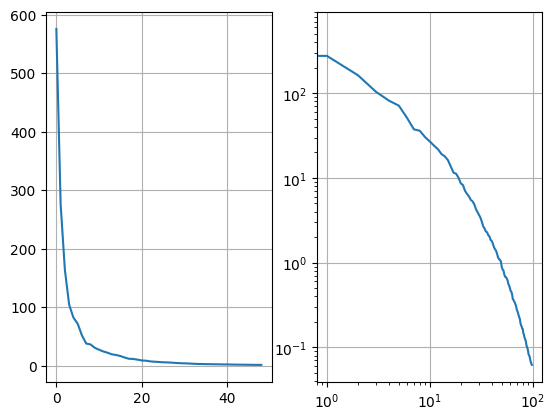

In [ ]:
# Extraction of the POD basis
from scipy.linalg import svd
X,s,Yt=svd(utrain,full_matrices=False)
plt.subplot(1,2,1)
plt.plot(s[1:50])
plt.grid()
plt.subplot(1,2,2)
plt.loglog(s[1:100])
plt.grid()

# POD matrix
La POD matrix è niente altro che la snapshotmatrix ridotta usando SVD di cui selezioniamo però un $n$ numero di colonne!

(1940, 80)


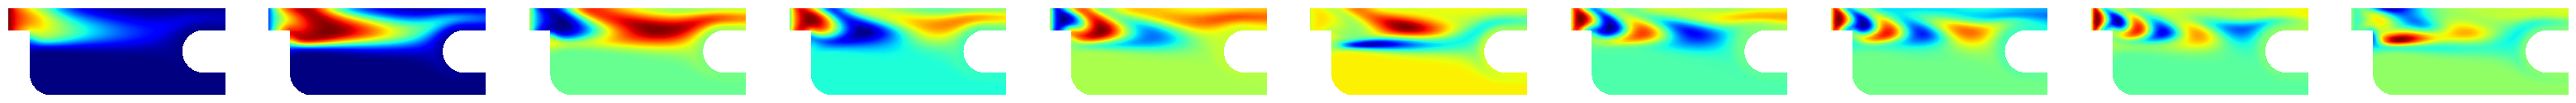

In [ ]:
n=80
V=X[:,:n] #POD matrix
print(V.shape)
fe.multiplot(V[:,:10].T,(1,10),Vh)

In [ ]:
# 4. Projection error over the test set
print(Vh.dim())
print(u.shape)
#proiettiamo l'intero data-set sullo spazio V
print(u.reshape(-1,Vh.dim()).shape) # Ns x Nt, Nh
uproj= (u.reshape(14020,Vh.dim()) @ V @ V.T).reshape(20,701,1940) #questa è la proiezione sulla base ridotta u @ V @ V.T
print(uproj.shape) #con reshape(ns,nt,nh) riotteniamo la stessa dimensione degli original data u, solo che uproj sono i dati FOM proiettati sullo spazio ridotto, ora noi riotteniamo la stessa dimensione del detaset iniziale perche vogliamo calcolare l'errore dovuto a questa approssimazione
diff=u-uproj
print(diff.shape)
#calcolo l'errore tra i data-set FOM e i data-set proiettati su V
errors=(np.linalg.norm(u-uproj,axis=2)/np.linalg.norm(u,axis=2)).max(axis=1) #usiamo axis=2 in quanto abbiamo da fare la norma sulla dimesione dei valori 4033, poi axis=1 in quanto prendiamo il massimo dei tempi... questo è l'errore commesso durante la proiezione sullo spazio ridotto
num2p(errors[ntrain:].mean()) #errore di proiezione
print(errors[ntrain:])

1940
(20, 701, 1940)
(14020, 1940)
(20, 701, 1940)
(20, 701, 1940)
[0.02313723 0.00220399 0.00116516 0.00161412 0.00346721 0.15461954
 0.00153769 0.00172739 0.00202945 0.00043573]


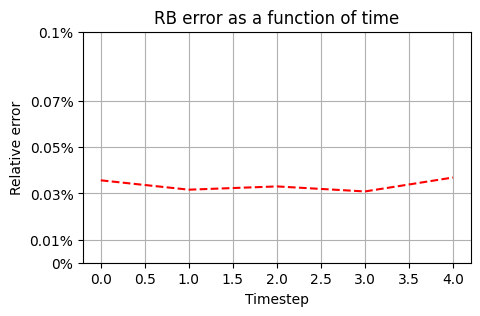

In [ ]:
#Plot of the projection errors
plt.figure(figsize = (5, 3))
plt.plot(errors[:5], '--r')
plt.xlabel("Timestep")
plt.ylabel("Relative error")
plt.title("RB error as a function of time")
plt.yticks([0, 0.0001, 0.0003,0.0005, 0.0007,0.001], ["0%", "0.01%", "0.03%", "0.05%","0.07%","0.1%"])
plt.grid()
plt.show()

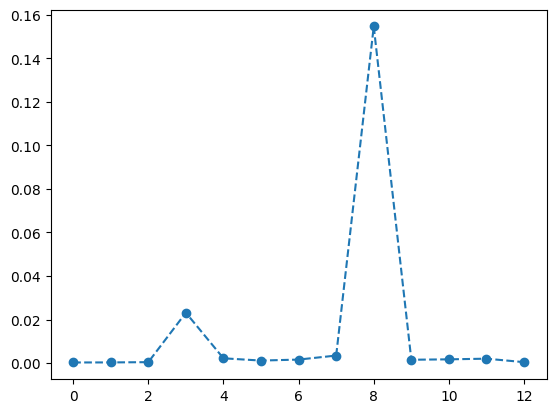

In [ ]:
plt.plot(errors[7:], '--o')

In [ ]:
#fe.animate(u[19],Vh) #animazione del test

In [ ]:
#fe.animate(uproj[19],Vh)

# Assembling delle matrici

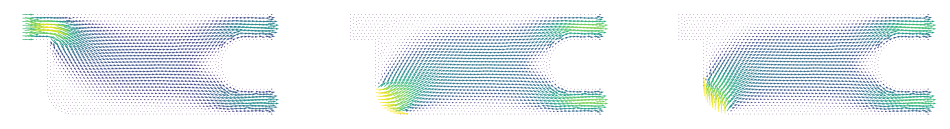

In [ ]:
b1=stokes_solver(1,0,0)
b2=stokes_solver(0,1,0)
b3=stokes_solver(0,0,1)
b1 = fe.asvector(b1, Vb)
b2 = fe.asvector(b2, Vb)
b3 = fe.asvector(b3, Vb)
fe.multiplot([b1,b2,b3],(1,3),Vh)
#print(b1.shape)

In [ ]:
from scipy.sparse import csr_matrix
M = fe.assemble(lambda u, v: u*v*dx, Vh)
S = fe.assemble(lambda u, v: 0.5*inner(grad(u), grad(v))*dx, Vh) # stiffness (diffusion) matrix

B1 = fe.assemble(lambda u, v: inner(b1, grad(u))*v*dx, Vh)
B2 = fe.assemble(lambda u, v: inner(b2, grad(u))*v*dx, Vh)
B3 = fe.assemble(lambda u, v: inner(b3, grad(u))*v*dx, Vh)

"""bc = fe.DirichletBC(lambda x: x[0]<1e-12, 0)
M = fe.applyBCs(M, Vh, bc)
S = fe.applyBCs(S, Vh, bc)
B = fe.applyBCs(B, Vh, bc)

B1 = fe.applyBCs(B1, Vh, bc)
B2 = fe.applyBCs(B2, Vh, bc)
B3 = fe.applyBCs(B3, Vh, bc)"""

#trasformo le matrici in forma sparsa per rendere la compilazione meno pesante
M=csr_matrix(M)
S=csr_matrix(S)
B1=csr_matrix(B1)
B2=csr_matrix(B2)
B3=csr_matrix(B3)
print(M.shape)

(1940, 1940)


# Proiezione degli operatori

In [ ]:
Mrb=V.T @ M @ V
B1rb=V.T @ B1 @ V
B2rb=V.T @ B2 @ V
B3rb=V.T @ B3 @ V
Srb= V.T @ S @ V

In [ ]:
# Initial conditions
u0f = fe.interpolate(
    lambda x: np.where(x[0] < 1e-12,  0,  -1),
    Vh
)
u0 = fe.dofs(u0f)
print(u0.shape,V.T.shape)
u = [u0] # list of states in time

(1940,) (80, 1940)


In [ ]:
"""def RBstep(c_now, dt, mu):
  c_1,c_2,c_3=mu
  Arb=Srb + c_1*B1rb + c_2*B2rb + c_3*B3rb #affine decomposition
  A = (Mrb + dt*Arb)
  rhs=Mrb @ c_now
  c_next= np.linalg.solve(A,rhs)

  return c_next"""

'def RBstep(c_now, dt, mu):\n  c_1,c_2,c_3=mu\n  Arb=Srb + c_1*B1rb + c_2*B2rb + c_3*B3rb #affine decomposition\n  A = (Mrb + dt*Arb)\n  rhs=Mrb @ c_now\n  c_next= np.linalg.solve(A,rhs)\n\n  return c_next'

In [ ]:
#caching and LU speedup
"""from scipy.linalg import lu_factor, lu_solve
def RBstep(c_now, dt, mu):
    # On first call, build and factorize the constant A once
    if not hasattr(RBstep, "_initialized"):
        c_1, c_2, c_3 = mu
        # affine part
        Arb = Srb + c_1 * B1rb + c_2 * B2rb + c_3 * B3rb
        # full reduced matrix
        A = Mrb + dt * Arb
        # LU factorization stored on the function
        RBstep._lu, RBstep._piv = lu_factor(A)
        # pre-allocated RHS buffer
        RBstep._rhs = np.empty_like(c_now)
        RBstep._initialized = True

    # compute RHS = Mrb @ c_now in place
    np.dot(Mrb, c_now, out=RBstep._rhs)
    # back-solve using the stored LU factors
    c_next = lu_solve((RBstep._lu, RBstep._piv), RBstep._rhs)

    return c_next"""

'from scipy.linalg import lu_factor, lu_solve\ndef RBstep(c_now, dt, mu):\n    # On first call, build and factorize the constant A once\n    if not hasattr(RBstep, "_initialized"):\n        c_1, c_2, c_3 = mu\n        # affine part\n        Arb = Srb + c_1 * B1rb + c_2 * B2rb + c_3 * B3rb\n        # full reduced matrix\n        A = Mrb + dt * Arb\n        # LU factorization stored on the function\n        RBstep._lu, RBstep._piv = lu_factor(A)\n        # pre-allocated RHS buffer\n        RBstep._rhs = np.empty_like(c_now)\n        RBstep._initialized = True\n\n    # compute RHS = Mrb @ c_now in place\n    np.dot(Mrb, c_now, out=RBstep._rhs)\n    # back-solve using the stored LU factors\n    c_next = lu_solve((RBstep._lu, RBstep._piv), RBstep._rhs)\n\n    return c_next'

In [ ]:
"""
def RBsolver(mu, dt = 0.0005, steps = 700):

  # Project initial condition
  c0=V.T @ u0 # è la proiezione della initial condtion

  # Time loop in the reduced space
  c=[c0]

  for n in range(steps):
    c_now= c[-1] #current state è l'ultimo elemento nella lista
    c_next=RBstep(c_now,dt,mu)
    c.append(c_next)

  c=np.stack(c,axis=0) #da lista a matrice
    # POD space

  # Lift back to FOM space
  u = c @ V.T #proiettiamo nello spazio del FOM
  #u=u+1
  u[0]=u0

  return u
"""

"\ndef RBsolver(mu, dt = 0.0005, steps = 700):\n\n  # Project initial condition\n  c0=V.T @ u0 # è la proiezione della initial condtion\n\n  # Time loop in the reduced space\n  c=[c0]\n\n  for n in range(steps):\n    c_now= c[-1] #current state è l'ultimo elemento nella lista\n    c_next=RBstep(c_now,dt,mu)\n    c.append(c_next)\n\n  c=np.stack(c,axis=0) #da lista a matrice\n    # POD space\n\n  # Lift back to FOM space\n  u = c @ V.T #proiettiamo nello spazio del FOM\n  #u=u+1\n  u[0]=u0\n\n  return u\n"

In [ ]:
#More memory and CPU efficient RBSolver function (RBsolver x2 più veloce!solo riusando le copie di matrici e pre-allocando spazio, evitando liste e np.stack)
from scipy.linalg import lu_factor, lu_solve
def RBsolver(mu, dt=5e-4, steps=700):
    # Avoid repeated lookups
    mu0, mu1, mu2 = mu

    # Reuse memory where possible
    Arb = Srb.copy()
    Arb += mu0 * B1rb
    Arb += mu1 * B2rb
    Arb += mu2 * B3rb

    A = Mrb.copy()
    A += dt * Arb

    # LU factorization once
    lu, piv = lu_factor(A)

    # Allocate result array once (avoid list + stack)
    n = Mrb.shape[0]
    c = np.empty((steps + 1, n), dtype=np.float64)

    # Project initial condition
    np.dot(V.T, u0, out=c[0])  # c[0] = Vrb.T @ u0

    # Reuse memory for rhs
    rhs = np.empty(n, dtype=np.float64)

    # Time-stepping loop
    for i in range(steps):
        Mrb @ c[i]  # RHS = Mrb @ c[i]
        rhs[:] = Mrb @ c[i]
        c[i + 1] = lu_solve((lu, piv), rhs)

    # Allocate and compute final projection (u = c @ Vrb.T)
    u = np.empty((steps + 1, V.shape[0]), dtype=np.float64)
    np.dot(c, V.T, out=u)

    return u

In [ ]:
mu0 = np.array([50,50,50])


t0 = perf_counter()
uFOM = FOMsolver(*mu0)[0]
t1 = perf_counter()
print("FOM evaluation time: %.2f milliseconds." % (1000*(t1-t0)))

t2 = perf_counter()
uRB = RBsolver(mu0)
t3 = perf_counter()
print("ROM evaluation time: %.2f milliseconds." % (1000*(t3-t2)))
print(f"*---* speed-up: x{(t1-t0)/(t3-t2):.2f}")

FOM evaluation time: 13050.80 milliseconds.
ROM evaluation time: 27.21 milliseconds.
*---* speed-up: x479.56


In [ ]:
v_lift = np.ones(1940)-(1-0.9999960604039893)

print(v_lift_fom.shape)

print("Before lift:", old_value := uRB[0,0])
uRB = uRB + v_lift[None, :]
print("After lift:", uRB[0,0])

(1940,)
Before lift: -0.9999960604039893
After lift: 0.0


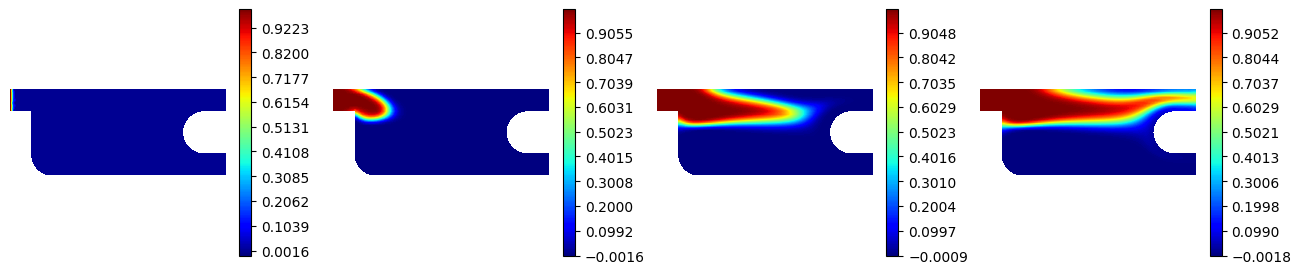

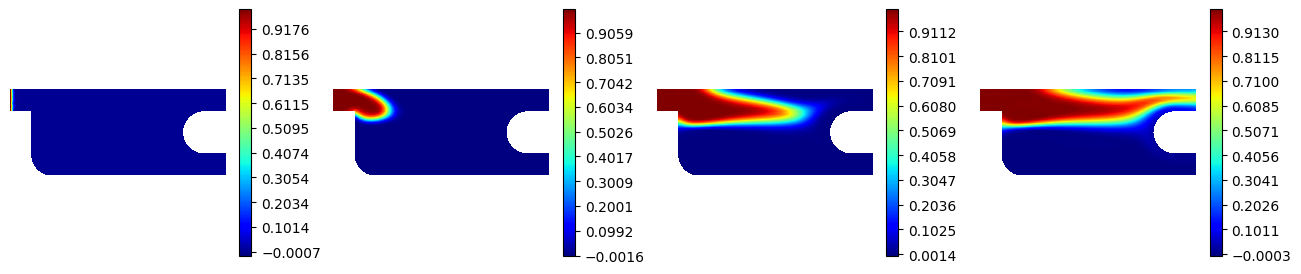

In [ ]:
fe.multiplot(uFOM[[1, 100,300, 500]], (1, 4), Vh,colorbar=True)
fe.multiplot(uRB[[1, 100,300, 500]],  (1, 4), Vh,colorbar=True)

In [ ]:
#fe.animate(uFOM[:,:],Vh)

In [ ]:
#fe.animate(uRB[:, :], Vh)

0.55%


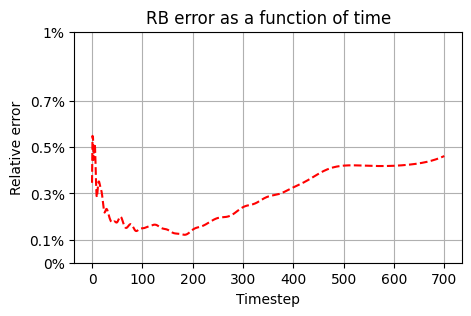

In [ ]:
errors = np.linalg.norm(uFOM-uRB, axis = 1)/np.linalg.norm(uFOM, axis = 1)
print(num2p(np.max(errors)))
plt.figure(figsize = (5, 3))
plt.plot(errors, '--r')
plt.xlabel("Timestep")
plt.ylabel("Relative error")
plt.title("RB error as a function of time")
plt.yticks([0, 0.001, 0.003,0.005, 0.007,0.01], ["0%", "0.1%", "0.3%", "0.5%","0.7%","1%"])
plt.grid()
plt.show()

# .VTK Generation
1. Fare accesso a google-drive
2. eliminare il commmento per la funzione $\texttt{vtk_named}$

In [ ]:
#Connection to Google Drive
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
# Time-Dependent VTK
"""from dlroms import *

def vtk_named(u, space, filename, name="Concentration"):
    u_ = fe.asvector(u, space)
    u_.rename(name, "")
    File(filename + ".pvd").write(u_)

# Usage:
for i in range(uRB.shape[0]):
    vtk_named(uRB[i], Vh, f"/content/drive/MyDrive/ROM_Dispenser/u_step_{i:04d}", name="Concentration")"""

'from dlroms import *\n\ndef vtk_named(u, space, filename, name="Concentration"):\n    u_ = fe.asvector(u, space)\n    u_.rename(name, "")\n    File(filename + ".pvd").write(u_)\n\n# Usage:\nfor i in range(uRB.shape[0]):\n    vtk_named(uRB[i], Vh, f"/content/drive/MyDrive/ROM_Dispenser/u_step_{i:04d}", name="Concentration")'

# IV Task

In [ ]:
theta_list=[]
RBsol_list=[]
vv=np.linspace(0,np.pi/2,200)

#ray
ray.shutdown()
ray.init(num_cpus=2) #CPU numbers->colab 2 CPU (2 threads)


@ray.remote
def iterator(i):
  mu0 = np.array([50,50*np.cos(vv[i]),50*np.sin(vv[i])])
  uRB_IV = RBsolver(mu0)
  return mu0,uRB_IV
n=len(vv)
t0=perf_counter()
features=[iterator.remote(i) for i in range(n)]
t1=perf_counter()
print(f"time:{(t1-t0)/60} minutes")
results=ray.get(features)
mu0,uRB_IV=zip(*results)
RBsol=np.array(uRB_IV)
theta=np.array(vv)
print(RBsol.shape,theta.shape)

#for-loop
t0=perf_counter()
for i in range(len(vv)):
  mu0 = np.array([50,50*np.cos(vv[i]),50*np.sin(vv[i])])
  uRB_IV = RBsolver(mu0)
  RBsol_list.append(uRB_IV)
  theta_list.append(vv[i])
t1=perf_counter()
print(f"loop time: {(t1-t0)/60} minutes")

#RBsol=np.array(RBsol_list)
#theta=np.array(theta_list)
print(RBsol.shape,theta.shape)

2025-05-22 08:33:07,386	INFO worker.py:1879 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


time:0.002122308416666859 minutes
(200, 701, 1940) (200,)
loop time: 0.20138279153333277 minutes
(200, 701, 1940) (200,)


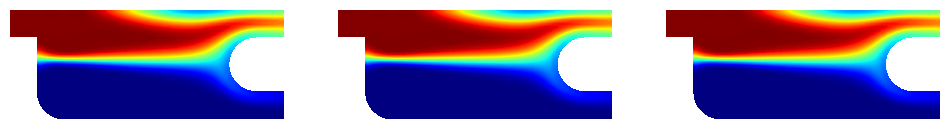

In [ ]:
t=700
fe.multiplot([RBsol[150,t,:Vh.dim()] for _ in range(3)],(1,3),Vh)

In [ ]:
print(RBsol.shape,theta.shape)

out_list=[]
for i in range(len(vv)):
  out=np.abs(bottomOutflow(RBsol[i]))
  out_list.append(out)

out=np.array(out_list)
print(out.shape)

(200, 701, 1940) (200,)
(200,)


In [ ]:
max=np.max(out)
print(max)


0.9718080156251236


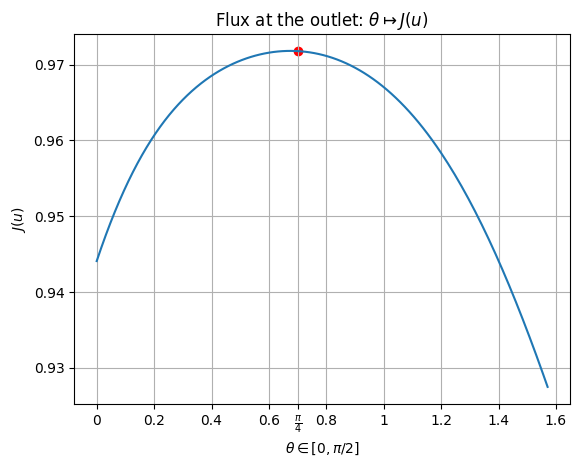

In [ ]:
plt.plot(theta,out[:])
plt.title("Flux at the outlet: $\\theta \\mapsto J(u)$")
plt.xlabel(r"$\theta\in [0,\pi/2]$")
plt.ylabel("$J(u)$")
plt.xticks([0, 0.2, 0.4,0.6, 0.7,0.8,1,1.2,1.4,1.6], ["0", "0.2", "0.4", "0.6",r"$\frac{\pi}{4}$","0.8","1","1.2","1.4","1.6"])
plt.scatter(0.7,max,color="red") #around the maximum value
plt.grid(True)

In [ ]:
#pi/2*x=conversion_factor
def conversion(theta):
  return vv[i]/(np.pi/2)

conversion_list=[]
for i in range(len(vv)):
  conversion_factor=conversion(theta[i])
  conversion_list.append(conversion_factor)

conversion=np.array(conversion_list)
#print(conversion[::25]) #200/8=25
conversion_sub = np.append(conversion[::25], conversion[-1])
print(conversion_sub) #coefficienti
rad=conversion_sub*np.pi/2
np.degrees(rad)
print(rad)

[0.         0.12562814 0.25125628 0.37688442 0.50251256 0.6281407
 0.75376884 0.87939698 1.        ]
[0.         0.19733622 0.39467244 0.59200867 0.78934489 0.98668111
 1.18401733 1.38135355 1.57079633]


# Latin-HyperCube sampling
+ L.H. 4 Snapshot matrix
L'errore prodotto dal sampling LHS è maggiore rispetto al caso precedente, il motivo è che qui sampliamo 10 snapshots dalla matrice di snapshot-full (20 elementi) mentre nel caso precedente li prendiamo tutti (?)

In [ ]:
"""from dispenser import *
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.linalg import svd
from scipy.sparse import csr_matrix
import time

# 0. Precompute convective operators (Stokes modes)
#    get the three velocity fields once, then assemble transport matrices
b1, b2, b3 = stokes_solver(1,0,0), stokes_solver(0,1,0), stokes_solver(0,0,1)
b1 = fe.asvector(b1, Vb)
b2 = fe.asvector(b2, Vb)
b3 = fe.asvector(b3, Vb)

A1 = fe.assemble(lambda u, v: inner(b1, grad(u)) * v * dx, Vh)
A2 = fe.assemble(lambda u, v: inner(b2, grad(u)) * v * dx, Vh)
A3 = fe.assemble(lambda u, v: inner(b3, grad(u)) * v * dx, Vh)

# convert to SciPy CSR (assemble may already return SciPy; this ensures csr format)
B1 = csr_matrix(A1)
B2 = csr_matrix(A2)
B3 = csr_matrix(A3)

# 1. Generate FOM snapshots via Latin hypercube
samples = 20
lhs_samples = lhs(3, samples=samples, criterion='center')
params = lhs_samples * 50.0
u_data = np.array([FOMsolver(c1, c2, c3)[0] for c1, c2, c3 in params])

# 2. Build POD basis
ntrain = 15
Nh = Vh.dim()
snapshots = u_data[:ntrain].reshape(-1,Nh).T   # (Nh) × (ntrain × Nt)
U, s, _ = svd(snapshots, full_matrices=False)
n_modes = 45
Vrb = U[:, :n_modes]    # Nh × n_modes

# 3. Assemble reduced operators
Mrb  = Vrb.T @ csr_matrix(M) @ Vrb
Srb  = Vrb.T @ csr_matrix(S) @ Vrb
B1rb = Vrb.T @ B1 @ Vrb
B2rb = Vrb.T @ B2 @ Vrb
B3rb = Vrb.T @ B3 @ Vrb

# 4. Initial condition (lifted: 1 on inflow boundary)
u0f = fe.interpolate(lambda x: np.where(x[0] < 1e-12, 1.0, 0.0), Vh)
u0  = fe.dofs(u0f)

# 5. ROM solver

def RBsolver(mu, dt=5e-4, steps=700):
    c = Vrb.T @ u0
    coeffs = [c]
    for _ in range(steps):
        Arb = Srb + mu[0]*B1rb + mu[1]*B2rb + mu[2]*B3rb
        A   = Mrb + dt * Arb
        c   = np.linalg.solve(A, Mrb @ c)
        coeffs.append(c)
    return np.stack(coeffs, axis=0) @ Vrb.T

# 6. Validate against FOM
mu0  = np.array([50,50,50])
uFOM = FOMsolver(*mu0)[0]     # *args, prendere [0] significa solo il primo return della funzione FOMSolver che invece ritorna 5 elementi posizionali!!!
uROM = RBsolver(mu0)
# use axis=1 for timesteps
errors = np.linalg.norm(uFOM - uROM, axis=1) / np.linalg.norm(uFOM, axis=1)
print("Max error:", errors.max())
#fe.animate(uFOM, Vh)
#fe.animate(uROM, Vh)"""


'from dispenser import *\nfrom fenics import *\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom pyDOE import lhs\nfrom scipy.linalg import svd\nfrom scipy.sparse import csr_matrix\nimport time\n\n# 0. Precompute convective operators (Stokes modes)\n#    get the three velocity fields once, then assemble transport matrices\nb1, b2, b3 = stokes_solver(1,0,0), stokes_solver(0,1,0), stokes_solver(0,0,1)\nb1 = fe.asvector(b1, Vb)\nb2 = fe.asvector(b2, Vb)\nb3 = fe.asvector(b3, Vb)\n\nA1 = fe.assemble(lambda u, v: inner(b1, grad(u)) * v * dx, Vh)\nA2 = fe.assemble(lambda u, v: inner(b2, grad(u)) * v * dx, Vh)\nA3 = fe.assemble(lambda u, v: inner(b3, grad(u)) * v * dx, Vh)\n\n# convert to SciPy CSR (assemble may already return SciPy; this ensures csr format)\nB1 = csr_matrix(A1)\nB2 = csr_matrix(A2)\nB3 = csr_matrix(A3)\n\n# 1. Generate FOM snapshots via Latin hypercube\nsamples = 20\nlhs_samples = lhs(3, samples=samples, criterion=\'center\')\nparams = lhs_samples * 50.0\nu_data = n

In [ ]:
"""errors = np.linalg.norm(uFOM-uROM, axis = 1)/np.linalg.norm(uFOM, axis = 1)
print(np.max(errors))
plt.figure(figsize = (5, 3))
plt.plot(errors, '--r')
plt.xlabel("Timestep")
plt.ylabel("Relative error")
plt.title("RB error as a function of time")
plt.yticks([0, 0.05, 0.10, 0.21], ["0%", "5%", "10%", "21%"])
plt.grid()
plt.show()"""

'errors = np.linalg.norm(uFOM-uROM, axis = 1)/np.linalg.norm(uFOM, axis = 1)\nprint(np.max(errors))\nplt.figure(figsize = (5, 3))\nplt.plot(errors, \'--r\')\nplt.xlabel("Timestep")\nplt.ylabel("Relative error")\nplt.title("RB error as a function of time")\nplt.yticks([0, 0.05, 0.10, 0.21], ["0%", "5%", "10%", "21%"])\nplt.grid()\nplt.show()'